## Tarea 1: Análisis Estadístico Descriptivo


Introducción
Este notebook presenta un análisis estadístico completo de un conjunto de datos. El objetivo es aplicar las técnicas fundamentales de la estadística descriptiva para caracterizar la distribución, tendencia central, dispersión, forma y posición de los datos, culminando en una interpretación integral de sus propiedades.

### 1. Preparación del Entorno y Carga de Datos
En esta primera sección, importaremos las librerías de Python que son esenciales para el análisis numérico y la visualización, como Pandas, NumPy, Matplotlib, Seaborn y SciPy. Posteriormente, se definirán o cargarán los datos que serán objeto de este estudio.


In [21]:
import pandas as pd # Cargar datos
import numpy as np # Calcular estadísticas
import matplotlib.pyplot as plt # Graficar
import seaborn as sns # Graficar
import plotly.graph_objects as go # Graficar
import plotly.express as px # Graficar
from plotly.subplots import make_subplots # Graficar
from scipy.stats import gmean, hmean, trim_mean # Calcular estadísticas


df = pd.read_csv(r"Iris.csv") # Cargar datos

df.head() # Mostrar los primeros 5 registros

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5



## Distribución de Frecuencias y Gráficos
El primer paso del análisis es agrupar los datos para entender cómo se distribuyen sus frecuencias.

## 1. Tabla de Distribución de Frecuencias (8 Clases)
Para construir la tabla, primero debemos determinar el rango, el número de clases (8, según el requisito) y la amplitud de cada clase. Con estos valores, construiremos los intervalos y calcularemos las frecuencias correspondientes (absoluta, acumulada, relativa y relativa acumulada).


### --- Paso 1: Recolectar la variable cuantitativa ---
Cargamos el dataset y seleccionamos nuestra variable de interés.


In [ ]:
data = df['SepalLengthCm'] # Cargar datos
print(f"Se han cargado {len(data)} registros.\n")

Se han cargado 150 registros.



### --- Paso 2: Ordenar los datos y determinar el rango ---

In [ ]:
print("Paso 2: Calculando el rango de los datos")
valor_minimo = data.min() # Calcular el valor mínimo
valor_maximo = data.max() # Calcular el valor máximo
rango = valor_maximo - valor_minimo # Calcular el rango
print(f"Valor Mínimo: {valor_minimo}") 
print(f"Valor Máximo: {valor_maximo}")
print(f"Rango (R): {rango:.2f}\n")

Paso 2: Calculando el rango de los datos
Valor Mínimo: 4.3
Valor Máximo: 7.9
Rango (R): 3.60



### --- Paso 3: Elegir el número de clases (k) con la Regla de Sturges ---

In [ ]:
print("Paso 3: Determinando el número de clases (k) con la Regla de Sturges")
n = len(data) # Número de registros
k = 1 + 3.322 * np.log10(n) # Regla de Sturges
k = int(round(k)) # Redondeamos al entero más cercano
print(f"Número de registros (n): {n}")
print(f"Número de clases calculado (k = 1 + 3.322 * log10(n)): {k:.4f}")
print(f"Número de clases a utilizar (redondeado): {k}\n")

Paso 3: Determinando el número de clases (k) con la Regla de Sturges
Número de registros (n): 150
Número de clases calculado (k = 1 + 3.322 * log10(n)): 8.0000
Número de clases a utilizar (redondeado): 8



### --- Paso 4: Calcular la amplitud del intervalo ---

In [ ]:
print("Paso 4: Calculando la amplitud del intervalo de clase")
# Calcular la amplitud del intervalo de clase
amplitud = rango / k
# A menudo se redondea hacia arriba para asegurar que todos los datos queden cubiertos.
# Usaremos un redondeo a un decimal para tener límites manejables.
amplitud = np.ceil(amplitud * 10) / 10 
print(f"Amplitud calculada (Rango / k): {rango / k:.4f}")
print(f"Amplitud a utilizar (redondeada hacia arriba): {amplitud}\n")

Paso 4: Calculando la amplitud del intervalo de clase
Amplitud calculada (Rango / k): 0.4500
Amplitud a utilizar (redondeada hacia arriba): 0.5



### --- Paso 5: Establecer los intervalos de clase ---

In [ ]:
print("Paso 5: Definiendo los límites de cada clase") 
limites = np.arange(valor_minimo, valor_maximo + amplitud, amplitud) #Calcula el limite de los intervalos
print("Límites de los intervalos:")
print(limites)
print("\n")


Paso 5: Definiendo los límites de cada clase
Límites de los intervalos:
[4.3 4.8 5.3 5.8 6.3 6.8 7.3 7.8 8.3]




### --- Paso 6: Contar cuántos datos caen en cada intervalo (Frecuencia Absoluta) ---


In [ ]:
print("Paso 6 y 7: Construyendo la Tabla de Distribución de Frecuencias Completa\n")

# Usamos pd.cut para agrupar los datos en los intervalos que definimos.
intervalos = pd.cut(data, bins=limites, right=False, include_lowest=True) # Agrupar los datos en los intervalos
print(intervalos)
print("\n")

freq_abs = intervalos.value_counts().sort_index() # Frecuencia Absoluta (fi)

marcas_clase = [(interval.left + interval.right) / 2 for interval in freq_abs.index] # Marca de Clase (xi) - el punto medio de cada intervalo

freq_acum = freq_abs.cumsum() # Frecuencia Acumulada (Fi)

freq_rel = freq_abs / n # Frecuencia Relativa (hi)

freq_rel_acum = freq_rel.cumsum() # Frecuencia Relativa Acumulada (Hi)

# Construimos el DataFrame final para la tabla
tabla_frecuencias = pd.DataFrame({
    'Intervalo de Clase': freq_abs.index,
    'Marca de Clase (xi)': marcas_clase, 
    'Frecuencia Absoluta (fi)': freq_abs.values,
    'Frecuencia Acumulada (Fi)': freq_acum.values,
    'Frecuencia Relativa (hi)': freq_rel.values,
    'Frecuencia Relativa Acum. (Hi)': freq_rel_acum.values
})

# Mostramos la tabla final
print(tabla_frecuencias.to_string())


Paso 6 y 7: Construyendo la Tabla de Distribución de Frecuencias Completa

  Intervalo de Clase  Marca de Clase (xi)  Frecuencia Absoluta (fi)  Frecuencia Acumulada (Fi)  Frecuencia Relativa (hi)  Frecuencia Relativa Acum. (Hi)
0         [4.3, 4.8)                 4.55                        11                         11                  0.073333                        0.073333
1         [4.8, 5.3)                 5.05                        34                         45                  0.226667                        0.300000
2         [5.3, 5.8)                 5.55                        28                         73                  0.186667                        0.486667
3         [5.8, 6.3)                 6.05                        26                         99                  0.173333                        0.660000
4         [6.3, 6.8)                 6.55                        31                        130                  0.206667                        0.866667
5      

## 2. Histograma de Frecuencias Absolutas
El histograma es la representación visual de la tabla de frecuencias. Nos permite observar de forma gráfica la forma, el centro y la dispersión de los datos.



Generando el histograma...


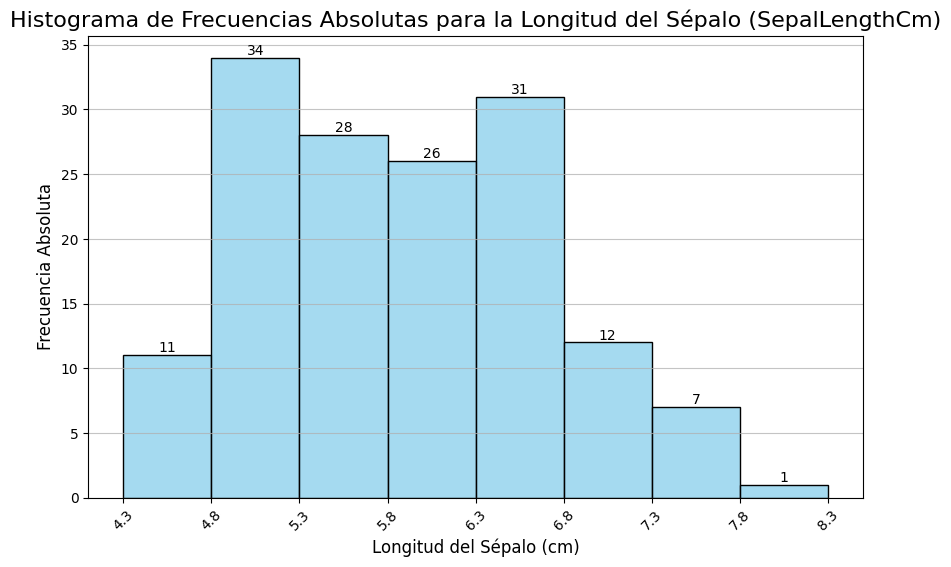

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print("\nGenerando el histograma...")

plt.figure(figsize=(10, 6)) # Tamaño de la figura
sns.histplot(data, bins=limites, kde=False, color='skyblue', edgecolor='black') # Histograma

plt.title('Histograma de Frecuencias Absolutas para la Longitud del Sépalo (SepalLengthCm)', fontsize=16) # Título del histograma
plt.xlabel('Longitud del Sépalo (cm)', fontsize=12) # Etiqueta del eje x
plt.ylabel('Frecuencia Absoluta', fontsize=12) # Etiqueta del eje y
plt.xticks(limites, rotation=45) # Etiquetas del eje x con rotación
plt.grid(axis='y', alpha=0.75) # Grilla en el eje y

# Añadir etiquetas de frecuencia sobre cada barra
for rect in plt.gca().patches: # Recorrer cada barra
    y_value = rect.get_height() # Obtener la altura de la barra
    x_value = rect.get_x() + rect.get_width() / 2 # Obtener el centro de la barra
    if y_value > 0: # Si la altura es mayor a 0, se añade la etiqueta
        # Añadir la etiqueta con el valor de la altura
        plt.annotate(f'{int(y_value)}', (x_value, y_value), ha='center', va='bottom', fontsize=10)

plt.show()

### Histogramas de frecuencia absoluta de las cuatro clases del Dtaset con Plotly

In [ ]:
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
especies = df['Species'].unique()

# --- Gráfico 1: Histogramas de Frecuencias Absolutas en Subplots ---
print("\nGenerando histogramas de frecuencias absolutas en subplots para cada especie...")
for columna in columnas_numericas:
    # --- PASO CLAVE: Calcular los límites de los intervalos UNA VEZ para la columna completa ---
    # Esto asegura que todos los subplots usen la misma escala y clases para una comparación justa.
    data_global = df[columna] # Datos globales para la columna
    n_global = len(data_global) # Número total de datos
    k_global = int(round(1 + 3.322 * np.log10(n_global))) # Número de intervalos
    rango_global = data_global.max() - data_global.min() # Rango global para la columna
    if k_global == 0: k_global = 1 # Si k_global es 0, se asigna 1 para evitar división por cero
    amplitud_global = np.ceil((rango_global / k_global) * 10) / 10 # Amplitud global para la columna
    if amplitud_global == 0: amplitud_global = 0.1 # Si amplitud_global es 0, se asigna 0.1 para evitar división por cero
    limites_globales = np.arange(data_global.min(), data_global.max() + amplitud_global, amplitud_global) # Límites globales para la columna
    
    # Crear una figura con 1 fila y 3 columnas para cada especie
    fig_hist = make_subplots(
        rows=1, cols=3, 
        subplot_titles=[f'{especie}' for especie in especies]
    )

    # Iterar sobre cada especie para añadir su histograma al subplot correspondiente
    for i, especie in enumerate(especies):
        # Filtrar el dataframe para la especie actual
        df_especie = df[df['Species'] == especie]
        
        # Contar las frecuencias usando los límites globales que calculamos
        intervalos = pd.cut(df_especie[columna], bins=limites_globales, right=False, include_lowest=True)
        freq_abs = intervalos.value_counts().sort_index()
        
        # Usamos un gráfico de barras para representar las frecuencias de nuestros intervalos predefinidos
        fig_hist.add_trace(go.Bar(
            x=[str(interval) for interval in freq_abs.index], # Etiquetas de los intervalos
            y=freq_abs.values, # Frecuencias absolutas calculadas
            name=especie,
            marker_color=px.colors.qualitative.Plotly[i]
        ), row=1, col=i+1)

    # Actualizar el diseño general de la figura
    fig_hist.update_layout(
        title_text=f'Distribución de {columna} (Separado por Especie)',
        showlegend=False,
        bargap=0 # Juntamos las barras para que parezca un histograma
    )
    # Actualizar los títulos de los ejes para cada subplot
    for i in range(len(especies)):
        fig_hist.update_xaxes(title_text=f"{columna} (cm)", tickangle=45, row=1, col=i+1)
        fig_hist.update_yaxes(title_text="Frecuencia Absoluta", row=1, col=i+1)
        
    fig_hist.show()




Generando histogramas de frecuencias absolutas en subplots para cada especie...


## 3. Polígono de Frecuencias
Superpuesto al histograma, el polígono de frecuencias une los puntos medios de la parte superior de cada barra, ayudando a visualizar la forma de la distribución de manera más suave.

In [ ]:
print("\nGenerando polígonos de frecuencias en subplots para cada especie...")
for columna in columnas_numericas:
    # Crear una figura con 1 fila y 3 columnas
    fig_poly = make_subplots(
        rows=1, cols=3,
        subplot_titles=[f'{especie}' for especie in especies]
    )

    # Iteramos sobre cada especie para calcular su distribución y añadirla al subplot
    for i, especie in enumerate(especies):
        df_especie = df[df['Species'] == especie] # Datos para la especie
        data_actual = df_especie[columna] # Datos para la columna
        
        n = len(data_actual) # Número de datos para la especie
        if n > 1: # Si hay más de 1 dato, se calcula la distribución
            k = int(round(1 + 3.322 * np.log10(n))) # Número de intervalos para la especie
            rango = data_actual.max() - data_actual.min() # Rango para la especie
            if k == 0: k = 1 # Si k es 0, se asigna 1 para evitar división por cero
            amplitud = np.ceil((rango / k) * 10) / 10 # Amplitud para la especie
            if amplitud == 0: amplitud = 0.1 # Si amplitud es 0, se asigna 0.1 para evitar división por cero
            
            limites_globales = np.arange(df[columna].min(), df[columna].max() + amplitud, amplitud) # Límites globales para la columna
            intervalos = pd.cut(data_actual, bins=limites_globales, right=False, include_lowest=True) # Intervalos para la especie
            freq_abs = intervalos.value_counts().sort_index() # Frecuencia absoluta para la especie
            marcas_clase = [interval.mid for interval in freq_abs.index] # Marcas de clase para la especie

            # Añadir el polígono de esta especie al subplot correspondiente
            fig_poly.add_trace(go.Scatter(
                x=marcas_clase,
                y=freq_abs.values,
                mode='lines+markers',
                name=especie,
                line=dict(color=px.colors.qualitative.Plotly[i])
            ), row=1, col=i+1)

    # Actualizar el diseño general de la figura
    fig_poly.update_layout(
        title_text=f'Polígonos de Frecuencias para {columna} (Separado por Especie)',
        showlegend=False
    )
    # Actualizar los títulos de los ejes para cada subplot
    for i in range(len(especies)):
        fig_poly.update_xaxes(title_text=f"{columna} (cm)", row=1, col=i+1) # Título del eje x para la columna
        fig_poly.update_yaxes(title_text="Frecuencia", row=1, col=i+1) # Título del eje y para la columna

    fig_poly.show()





Generando polígonos de frecuencias en subplots para cada especie...


In [ ]:
print("\nGenerando histogramas con polígonos superpuestos para cada especie...")
for columna in columnas_numericas: # Iterar sobre cada columna numérica
    # Crear la figura con subplots
    fig_combined = make_subplots(
        rows=1, cols=3, # 1 fila, 3 columnas
        subplot_titles=[f'{especie}' for especie in especies] # Título para cada subplot
    )

    # Usar los mismos límites globales calculados para los histogramas para consistencia
    data_global = df[columna] # Datos globales para la columna
    n_global = len(data_global) # Número de datos globales para la columna
    k_global = int(round(1 + 3.322 * np.log10(n_global))) # Número de intervalos globales para la columna
    rango_global = data_global.max() - data_global.min() # Rango global para la columna
    if k_global == 0: k_global = 1 # Si k_global es 0, se asigna 1 para evitar división por cero
    amplitud_global = np.ceil((rango_global / k_global) * 10) / 10 # Amplitud global para la columna
    if amplitud_global == 0: amplitud_global = 0.1 # Si amplitud_global es 0, se asigna 0.1 para evitar división por cero
    limites_globales = np.arange(data_global.min(), data_global.max() + amplitud_global, amplitud_global) # Límites globales para la columna

    # Iterar sobre cada especie para añadir su histograma Y su polígono
    for i, especie in enumerate(especies): # Iterar sobre cada especie
        df_especie = df[df['Species'] == especie] # Datos para la especie
        
        # Calcular frecuencias y marcas de clase
        intervalos = pd.cut(df_especie[columna], bins=limites_globales, right=False, include_lowest=True) # Intervalos para la especie
        freq_abs = intervalos.value_counts().sort_index() # Frecuencia absoluta para la especie
        marcas_clase = [interval.mid for interval in freq_abs.index] # Marcas de clase para la especie

        # 1. Añadir el histograma (como gráfico de barras)
        fig_combined.add_trace(go.Bar(
            x=[str(interval) for interval in freq_abs.index], # Usamos las mismas etiquetas de x que las barras|
            y=freq_abs.values, # Usamos las mismas etiquetas de y que las barras
            name=f'{especie} Histograma', # Nombre para la especie
            marker_color=px.colors.qualitative.Plotly[i], # Color para la especie
            opacity=0.6 # Opacidad para que la línea se vea bien
        ), row=1, col=i+1) # Añadir el histograma al subplot

        # 2. Añadir el polígono de frecuencias (como gráfico de líneas)
        fig_combined.add_trace(go.Scatter(
            x=[str(interval) for interval in freq_abs.index], # Usamos las mismas etiquetas de x que las barras
            y=freq_abs.values, # Usamos las mismas etiquetas de y que las barras
            mode='lines+markers', # Modo para que se muestren líneas y marcadores
            name=f'{especie} Polígono', # Nombre para la especie
            line=dict(color='black', width=2) # Color y ancho de la línea
        ), row=1, col=i+1) # Añadir el polígono al subplot

    # Actualizar el diseño general
    fig_combined.update_layout( # Actualizar el diseño general
        title_text=f'Histograma y Polígono de Frecuencias para {columna}', # Título para el gráfico
        showlegend=False, # Ocultar la leyenda
        bargap=0 
    )
    # Actualizar los títulos de los ejes para cada subplot
    for i in range(len(especies)): # Iterar sobre cada subplot
        fig_combined.update_xaxes(title_text=f"{columna} (cm)", tickangle=45, row=1, col=i+1) # Título para el eje x
        fig_combined.update_yaxes(title_text="Frecuencia Absoluta", row=1, col=i+1) # Título para el eje y

    fig_combined.show() # Mostrar el gráfico




Generando histogramas con polígonos superpuestos para cada especie...


## 4. Ojiva
La ojiva, o polígono de frecuencias acumuladas, es una gráfica que muestra la frecuencia acumulada. Es especialmente útil para estimar percentiles y determinar rápidamente cuántos datos se encuentran por debajo de un cierto valor.


In [ ]:
print("\nGenerando ojivas de frecuencias acumuladas para cada especie...")

# Lista de las columnas numéricas que queremos visualizar
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
especies = df['Species'].unique()

for columna in columnas_numericas:
    # --- PASO PREVIO: Calcular los límites de los intervalos UNA VEZ para la columna completa ---
    # Esto asegura que todos los subplots usen la misma escala y clases para una comparación justa.
    data_global = df[columna] # Datos globales para la columna
    n_global = len(data_global) # Número total de observaciones
    k_global = int(round(1 + 3.322 * np.log10(n_global))) # Número de clases
    rango_global = data_global.max() - data_global.min() # Rango de los datos
    if k_global == 0: k_global = 1 # Asegurarse de que k_global no sea cero
    amplitud_global = np.ceil((rango_global / k_global) * 10) / 10 # Amplitud de cada clase
    if amplitud_global == 0: amplitud_global = 0.1 # Asegurarse de que la amplitud no sea cero
    limites_globales = np.arange(data_global.min(), data_global.max() + amplitud_global, amplitud_global) # Límites globales para las clases
    
    # Crear la figura con subplots
    fig_ojiva = make_subplots(
        rows=1, cols=3, # 1 fila, 3 columnas
        subplot_titles=[f'{especie}' for especie in especies], # Título para cada subplot
        shared_yaxes=True # Compartir el eje Y ayuda a la comparación
    )

    # Iterar sobre cada especie para calcular y añadir su ojiva
    for i, especie in enumerate(especies): # Iterar sobre cada especie
        df_especie = df[df['Species'] == especie] # Filtrar los datos por especie
        
        # --- Paso 1: Calcular Frecuencias Acumuladas ---
        # Primero, obtenemos las frecuencias absolutas usando los límites globales
        intervalos = pd.cut(df_especie[columna], bins=limites_globales, right=False, include_lowest=True)
        freq_abs = intervalos.value_counts().sort_index()
        # Luego, calculamos la frecuencia acumulada
        freq_acumulada = freq_abs.cumsum()
        
        # --- Paso 2: Preparar los Ejes ---
        
        limites_superiores = limites_globales[1:] # El eje X son los límites superiores de cada clase
        valores_acumulados = freq_acumulada.values # El eje Y son las frecuencias acumuladas
        
        # --- Paso 5: Comenzar desde cero ---
        # Añadimos un punto en el límite inferior de la primera clase con frecuencia acumulada de 0
        x_puntos = np.insert(limites_superiores, 0, limites_globales[0]) # Insertar el límite inferior al inicio
        y_puntos = np.insert(valores_acumulados, 0, 0) # Insertar 0 al inicio

        # --- Pasos 3 y 4: Trazar la línea que une los puntos ---
        fig_ojiva.add_trace(go.Scatter( # Añadir un trazo de tipo Scatter (línea y marcadores)
            x=x_puntos, # Eje X: límites superiores de cada clase
            y=y_puntos, # Eje Y: frecuencias acumuladas
            mode='lines+markers', # Modo: líneas y marcadores
            name=especie, # Nombre de la especie para la leyenda
            line=dict(color=px.colors.qualitative.Plotly[i]), # Color de la línea
            marker=dict(color=px.colors.qualitative.Plotly[i]) # Color de los marcadores
        ), row=1, col=i+1)

    # Actualizar el diseño general de la figura
    fig_ojiva.update_layout( # Actualizar el diseño general de la figura
        title_text=f'Ojivas de Frecuencias Acumuladas para {columna}', # Título general de la figura
        showlegend=False # Ocultar la leyenda
    )
    # Actualizar los títulos de los ejes para cada subplot
    for i in range(len(especies)): # Iterar sobre cada especie
        fig_ojiva.update_xaxes(title_text=f"Límite Superior de {columna} (cm)", row=1, col=i+1) # Actualizar el título del eje X para cada subplot
    
    # Actualizar el título del eje Y (solo el del primer subplot al estar compartido)
    fig_ojiva.update_yaxes(title_text="Frecuencia Acumulada", row=1, col=1)

    fig_ojiva.show() # Mostrar la figura




Generando ojivas de frecuencias acumuladas para cada especie...


## 5. Medidas de Tendencia Central
Estas medidas nos indican el valor "típico" o central de nuestro conjunto de datos.

Media Aritmética: El promedio clásico.

Media Geométrica: Útil para tasas de crecimiento.

Media Armónica: Útil para promediar tasas y velocidades.

Media Recortada (5% en cada extremo): Un promedio más robusto que elimina la influencia de los valores extremos.

Mediana: El valor que se encuentra justo en el centro de los datos ordenados.

Moda: El valor que aparece con mayor frecuencia.

In [ ]:
print("\n--- Calculando Medidas de Tendencia Central ---")

# Lista de las columnas numéricas que queremos analizar
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# --- Tabla 1: Medidas para el Dataset Completo ---

# Diccionario para almacenar los resultados
stats_global = {}

# Iterar sobre cada columna para calcular las estadísticas
for col in columnas_numericas:
    data_series = df[col].dropna() # Asegurarnos de no tener nulos
    
    # La moda puede devolver múltiples valores, tomamos el primero por simplicidad.
    moda = data_series.mode()[0] if not data_series.mode().empty else np.nan
    
    stats_global[col] = {
        'Media Aritmética': data_series.mean(), # Media aritmética
        'Media Geométrica': gmean(data_series), # Media geométrica
        'Media Armónica': hmean(data_series), # Media armónica
        'Media Recortada (5%)': trim_mean(data_series, 0.05), # Media recortada (5%)
        'Mediana': data_series.median(), # Mediana
        'Moda': moda # Moda 
    }

# Convertir el diccionario a un DataFrame de Pandas para una mejor visualización
df_stats_global = pd.DataFrame(stats_global)

print("\nTabla de Medidas de Tendencia Central (Dataset Completo):")
# Usamos round() para mejorar la legibilidad de la tabla
print(df_stats_global.round(4))


# --- Tabla 2: Medidas Desglosadas por Especie ---

# Diccionario para almacenar los DataFrames de estadísticas de cada especie
stats_by_species = {}

# Definimos una función para la media recortada para usarla de forma consistente
def trimmed_mean_5(series): # Función para calcular la media recortada (5%)
    return trim_mean(series, 0.05) # Calcular la media recortada (5%)

# Iteramos sobre cada grupo de especies para calcular las estadísticas
for species, group_df in df.groupby('Species'): # Iterar sobre cada especie
    
    species_stats = {}
    # Iteramos sobre cada columna numérica dentro del grupo de la especie
    for col in columnas_numericas: # Iterar sobre cada columna numérica
        data_series = group_df[col].dropna() # Eliminar valores nulos
        
        # La moda puede devolver múltiples valores, tomamos el primero.
        moda = data_series.mode()[0] if not data_series.mode().empty else np.nan
        
        species_stats[col] = { # Diccionario para almacenar las estadísticas de la columna
            'Media Aritmética': data_series.mean(), # Media aritmética
            'Media Geométrica': gmean(data_series), # Media geométrica
            'Media Armónica': hmean(data_series), # Media armónica
            'Media Recortada (5%)': trimmed_mean_5(data_series), # Media recortada (5%)
            'Mediana': data_series.median(), # Mediana
            'Moda': moda # Moda 
        }
    
    # Guardamos el DataFrame de estadísticas para esta especie en nuestro diccionario
    stats_by_species[species] = pd.DataFrame(species_stats) # Convertir el diccionario a un DataFrame de Pandas

# Combinamos los resultados en un solo DataFrame con columnas de múltiples niveles para una presentación clara
df_stats_species_final = pd.concat(stats_by_species, axis=1)

print("\n\nTabla de Medidas de Tendencia Central (Desglosado por Especie):")
print(df_stats_species_final.round(4))




--- Calculando Medidas de Tendencia Central ---

Tabla de Medidas de Tendencia Central (Dataset Completo):
                      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Media Aritmética             5.8433        3.0540         3.7587        1.1987
Media Geométrica             5.7857        3.0236         3.2398        0.8378
Media Armónica               5.7289        2.9931         2.6965        0.4866
Media Recortada (5%)         5.8206        3.0463         3.7478        1.1912
Mediana                      5.8000        3.0000         4.3500        1.3000
Moda                         5.0000        3.0000         1.5000        0.2000


Tabla de Medidas de Tendencia Central (Desglosado por Especie):
                       Iris-setosa                                          \
                     SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm   
Media Aritmética            5.0060       3.4180        1.4640       0.2440   
Media Geométrica            4.9938     

## 6. Medidas de Dispersión
Estas medidas cuantifican qué tan "esparcidos" o "concentrados" están los datos respecto al centro.

Rango: La diferencia entre el valor máximo y el mínimo.

Desviación Absoluta Media: El promedio de las desviaciones absolutas respecto a la media.

Varianza: El promedio de las desviaciones al cuadrado.

Desviación Estándar: La raíz cuadrada de la varianza. Es la medida de dispersión más común.

Coeficiente de Variación: La desviación estándar dividida por la media. Útil para comparar la dispersión de datasets con diferentes escalas.

In [ ]:
print("\n\n--- Calculando Medidas de Dispersión ---")

# --- Tabla 1: Medidas para el Dataset Completo ---
stats_dispersion_global = {}

for col in columnas_numericas: # Iterar sobre cada columna numérica
    data_series = df[col].dropna() # Eliminar valores nulos
    
    stats_dispersion_global[col] = { # Diccionario para almacenar las estadísticas de la columna
        'Rango': np.ptp(data_series), # Rango
        'Desviación Absoluta Media': (data_series - data_series.mean()).abs().mean(), # Desviación absoluta media
        'Varianza': data_series.var(), # Varianza
        'Desviación Estándar': data_series.std(), # Desviación estándar
        'Coeficiente de Variación': data_series.std() / data_series.mean() if data_series.mean() != 0 else 0 # Coeficiente de variación
    }

df_dispersion_global = pd.DataFrame(stats_dispersion_global) # Convertir el diccionario a un DataFrame de Pandas
print("\nTabla de Medidas de Dispersión (Dataset Completo):") # Imprimir el DataFrame con encabezados
print(df_dispersion_global.round(4)) # Redondear los valores a 4 decimales

# --- Tabla 2: Medidas Desglosadas por Especie ---
dispersion_by_species = {} # Diccionario para almacenar las estadísticas de dispersión por especie

# Helper functions for calculations
def rango(series): # Función para calcular el rango
    return np.ptp(series) # Rango

def desviacion_abs_media(series): # Función para calcular la desviación absoluta media
    return (series - series.mean()).abs().mean() # Desviación absoluta media

def coef_variacion(series): # Función para calcular el coeficiente de variación
    mean = series.mean() # Media
    return series.std() / mean if mean != 0 else 0 # Coeficiente de variación

# Iterate over each species group
for species, group_df in df.groupby('Species'): # Iterar sobre cada grupo de especies
    species_dispersion_stats = {} # Diccionario para almacenar las estadísticas de dispersión por especie
    for col in columnas_numericas: # Iterar sobre cada columna numérica
        data_series = group_df[col].dropna() # Eliminar valores nulos
        
        species_dispersion_stats[col] = { # Diccionario para almacenar las estadísticas de la columna
            'Rango': rango(data_series), # Rango
            'Desviación Absoluta Media': desviacion_abs_media(data_series), # Desviación absoluta media
            'Varianza': data_series.var(), # Varianza
            'Desviación Estándar': data_series.std(), # Desviación estándar
            'Coeficiente de Variación': coef_variacion(data_series) # Coeficiente de variación
        }
    dispersion_by_species[species] = pd.DataFrame(species_dispersion_stats) # Convertir el diccionario a un DataFrame de Pandas

df_dispersion_species_final = pd.concat(dispersion_by_species, axis=1) # Concatenar los DataFrames por columnas

print("\n\nTabla de Medidas de Dispersión (Desglosado por Especie):") # Imprimir el DataFrame con encabezados
print(df_dispersion_species_final.round(4)) # Redondear los valores a 4 decimales





--- Calculando Medidas de Dispersión ---

Tabla de Medidas de Dispersión (Dataset Completo):
                           SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Rango                             3.6000        2.4000         5.9000   
Desviación Absoluta Media         0.6876        0.3331         1.5619   
Varianza                          0.6857        0.1880         3.1132   
Desviación Estándar               0.8281        0.4336         1.7644   
Coeficiente de Variación          0.1417        0.1420         0.4694   

                           PetalWidthCm  
Rango                            2.4000  
Desviación Absoluta Media        0.6589  
Varianza                         0.5824  
Desviación Estándar              0.7632  
Coeficiente de Variación         0.6367  


Tabla de Medidas de Dispersión (Desglosado por Especie):
                            Iris-setosa                             \
                          SepalLengthCm SepalWidthCm PetalLengthCm   
Rango          

## 7. Medidas de Forma
El sesgo y la curtosis describen la forma de la distribución de nuestros datos en comparación con una distribución normal.

Sesgo (Skewness): Mide la asimetría de la distribución.

Curtosis (Kurtosis): Mide qué tan "puntiaguda" o "achatada" es la distribución y el peso de sus colas.


In [ ]:
print("--- Calculando Medidas de Forma ---")

# Columnas numéricas a analizar
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Columnas numéricas a analizar

# --- Tabla 1: Medidas para el Dataset Completo (Sin cambios) ---
stats_forma_global = { # Diccionario con las medidas de forma
    'Asimetría (Skewness)': df[columnas_numericas].skew(), # Asimetría (Skewness)
    'Curtosis (Kurtosis)': df[columnas_numericas].kurt() # Curtosis (Kurtosis)
}
df_forma_global = pd.DataFrame(stats_forma_global) # Convertir el diccionario a un DataFrame de Pandas
print("\nTabla de Medidas de Forma (Dataset Completo):") # Imprimir el DataFrame con encabezados
print(df_forma_global.round(4)) # Redondear los valores a 4 decimales


# Medidas Desglosadas por Especie en Tablas Separadas ---

print("\n\n--- Medidas de Forma (Desglosado por Especie) ---")

# Tabla de Asimetría (Skewness) por Especie
df_asimetria_species = df.groupby('Species')[columnas_numericas].skew() # Asimetría (Skewness) por Especie
print("\nTabla de Asimetría (Skewness) por Especie:")
print(df_asimetria_species.round(4))

# Tabla de Curtosis (Kurtosis) por Especie
# Usamos .apply() con el método kurt() de pandas para obtener el mismo resultado que .kurt()
df_curtosis_species = df.groupby('Species')[columnas_numericas].apply(pd.DataFrame.kurt) # Curtosis (Kurtosis) por Especie
print("\nTabla de Curtosis (Kurtosis) por Especie:")
print(df_curtosis_species.round(4))


--- Calculando Medidas de Forma ---

Tabla de Medidas de Forma (Dataset Completo):
               Asimetría (Skewness)  Curtosis (Kurtosis)
SepalLengthCm                0.3149              -0.5521
SepalWidthCm                 0.3341               0.2908
PetalLengthCm               -0.2745              -1.4019
PetalWidthCm                -0.1050              -1.3398


--- Medidas de Forma (Desglosado por Especie) ---

Tabla de Asimetría (Skewness) por Especie:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa             0.1201        0.1071         0.0718        1.1972
Iris-versicolor         0.1054       -0.3628        -0.6065       -0.0312
Iris-virginica          0.1180        0.3659         0.5494       -0.1295

Tabla de Curtosis (Kurtosis) por Especie:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                          

## 8. Medidas de Posición y Análisis de Outliers
Estas herramientas nos ayudan a entender la posición relativa de los datos y a identificar valores atípicos.

Cuartiles y Deciles: Valores que dividen los datos ordenados en 4 y 10 partes iguales, respectivamente.

Outliers (Valores Atípicos): Se identificarán los outliers leves y extremos utilizando el método del rango intercuartílico (IQR).

Diagrama de Caja y Bigote (Box Plot): Una visualización poderosa que resume la distribución, la tendencia central, la dispersión y muestra explícitamente los outliers.



In [ ]:
print("\n\n--- Calculando Medidas de Posición y Analizando Outliers ---")

# --- Cuartiles y Deciles para el Dataset Completo ---
cuartiles_global = df[columnas_numericas].quantile([0.25, 0.50, 0.75]) # Cuartiles (Dataset Completo)
print("\nCuartiles (Dataset Completo):") # Imprimir el DataFrame con encabezados
print(cuartiles_global.round(4)) # Redondear los valores a 4 decimales

# --- Cuartiles por Especie ---
cuartiles_species = df.groupby('Species')[columnas_numericas].quantile([0.25, 0.50, 0.75]) # Cuartiles (Desglosado por Especie)
print("\n\nCuartiles (Desglosado por Especie):") # Imprimir el DataFrame con encabezados
print(cuartiles_species.round(4)) # Redondear los valores a 4 decimales


# --- Identificación de Outliers (Método IQR) ---
print("\n\n--- Identificando Outliers por el Método del Rango Intercuartílico (IQR) ---")
for col in columnas_numericas: # Iterar sobre cada columna numérica
    print(f"\n----- Outliers para '{col}' -----")
    for especie in sorted(df['Species'].unique()): # Iterar sobre cada especie única
        subset = df[df['Species'] == especie][col] # Subconjunto de datos para la especie actual
        
        Q1 = subset.quantile(0.25) # Calcular el primer cuartil (Q1)
        Q3 = subset.quantile(0.75) # Calcular el tercer cuartil (Q3)
        IQR = Q3 - Q1 # Calcular el rango intercuartílico (IQR)
        
        limite_inferior = Q1 - 1.5 * IQR # Calcular el límite inferior para outliers
        limite_superior = Q3 + 1.5 * IQR # Calcular el límite superior para outliers
        
        outliers = subset[(subset < limite_inferior) | (subset > limite_superior)] # Encontrar outliers
        
        if not outliers.empty: # Si se encontraron outliers
            print(f"  - Especie: {especie}")
            print(f"    Valores atípicos encontrados: {list(outliers.round(2))}")
        else:
            print(f"  - Especie: {especie} -> No se encontraron outliers.")

# --- Diagrama de Caja y Bigote (Box Plot) ---
print("\n\n--- Generando Diagramas de Caja y Bigote (Box Plots) ---")
for col in columnas_numericas: # Iterar sobre cada columna numérica
    fig = px.box( # Crear un diagrama de caja y bigote
        df, # DataFrame
        x='Species', # Variable categórica (Especie)
        y=col, # Variable numérica (Longitud del Pétalo)
        color='Species', # Color por especie
        title=f'Diagrama de Caja para {col} por Especie', # Título del diagrama
        points='all' # Mostrar todos los puntos
    )
    fig.update_layout( # Actualizar el layout del diagrama
        xaxis_title='Especie', # Título del eje x
        yaxis_title=f'{col} (cm)', # Título del eje y
        showlegend=False # Ocultar la leyenda
    )
    fig.show() # Mostrar el diagrama





--- Calculando Medidas de Posición y Analizando Outliers ---

Cuartiles (Dataset Completo):
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0.25            5.1           2.8           1.60           0.3
0.50            5.8           3.0           4.35           1.3
0.75            6.4           3.3           5.10           1.8


Cuartiles (Desglosado por Especie):
                      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa     0.25          4.800         3.125          1.400           0.2
                0.50          5.000         3.400          1.500           0.2
                0.75          5.200         3.675          1.575           0.3
Iris-versicolor 0.25          5.600         2.525          4.000           1.2
                0.50          5.900         2.800          4.350           1.3
                0.75          6.300         3.000          4.60

7. Conclusión General
Aquí, basado en todos los análisis anteriores, redacta una conclusión sobre las características principales del conjunto de datos. ¿Es simétrico o sesgado? ¿Qué tan dispersos están los datos? ¿Existen valores atípicos significativos y cuál podría ser su implicación?